# Import Libraries

In [1]:
import datetime
print("Model execution started at:" + datetime.datetime.today().ctime())

Model execution started at:Fri Mar  6 00:05:35 2020


In [2]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Fri Mar  6 00:05:35 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.59       Driver Version: 440.59       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1070    Off  | 00000000:01:00.0  On |                  N/A |
| N/A   74C    P3    29W /  N/A |   3415MiB /  8117MiB |      9%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [3]:
# from psutil import virtual_memory
# ram_gb = virtual_memory().total / 1e9
# print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

# if ram_gb < 20:
#   print('To enable a high-RAM runtime, select the Runtime → "Change runtime type"')
#   print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
#   print('re-execute this cell.')
# else:
#   print('You are using a high-RAM runtime!')

In [4]:
import src.dataset.dataset as dst
import src.dataset.dataloader as dl
import src.preprocessing.preprocessing as preprocessing
import matplotlib.pyplot as plt
import numpy as np
import src.utils.utils as utils
import src.models.train_model as train
%matplotlib inline

%config IPCompleter.greedy=True

In [5]:
import torch
print(torch.__version__)

1.4.0


In [6]:
preproc = preprocessing.Preprocessing()

train_transforms = preproc.gettraintransforms()
test_transforms = preproc.gettesttransforms()



In [7]:
ds = dst.Dataset()
train_dataset = ds.gettraindataset(train_transforms)
test_dataset = ds.gettestdataset(test_transforms)


Files already downloaded and verified
Files already downloaded and verified


In [8]:
dataloader = dl.Cifar10Dataloader(traindataset=train_dataset, testdataset=test_dataset)

train_loader = dataloader.gettraindataloader()
test_loader = dataloader.gettestdataloader()

CUDA Available? True
256


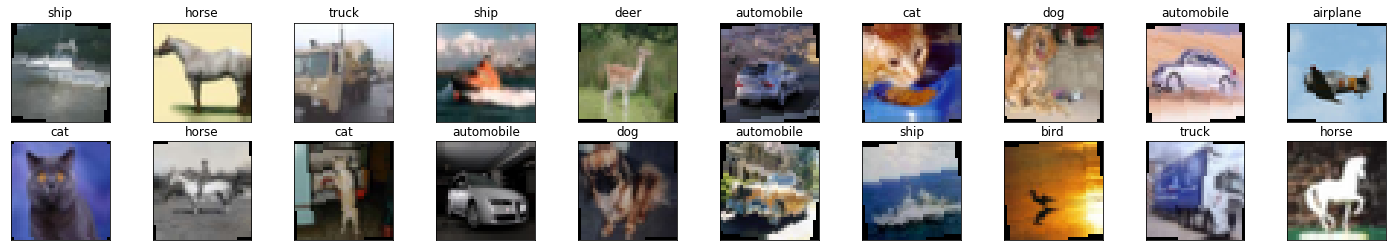

In [9]:
# specify the image classes
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# obtain one batch of training images
dataiterator = iter(train_loader)
images, labels = dataiterator.next()
images = images.numpy()  # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20 / 2, idx + 1, xticks=[], yticks=[])
    utils.Utils.imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [10]:
cnn_model, device = utils.Utils.createmodel()
train_model = train.TrainModel()
train_model.showmodelsummary(cnn_model)

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]             288
            Conv2d-6           [-1, 32, 32, 32]           1,056
DepthwiseSeparableConv2d-7           [-1, 32, 32, 32]               0
       BatchNorm2d-8           [-1, 32, 32, 32]              64
              ReLU-9           [-1, 32, 32, 32]               0
          Dropout-10           [-1, 32, 32, 32]               0
           Conv2d-11           [-1, 64, 30, 30]          18,432
      BatchNorm2d-12           [-1, 64, 30, 30]             128
             ReLU-13           [-1, 64, 30, 30]               0
          Dropout-14        

In [11]:
optimizer = utils.Utils.createoptimizer(cnn_model, lr=0.1, momentum=0.9, weight_decay=0)
scheduler = utils.Utils.createscheduler(optimizer, mode='max', factor=0.1, patience=5,
                                        verbose=True)

In [12]:
lr_data = []
epochs = 25
for epoch in range(0, epochs):
    print("EPOCH:", epoch)
    train_model.train(cnn_model, device, train_loader, optimizer, 1)
    t_acc_epoch = train_model.test(cnn_model, device, test_loader)
    scheduler.step(t_acc_epoch)
    for param_groups in optimizer.param_groups:
        print("Learning rate =", param_groups['lr'], " for epoch: ", epoch + 1)  # print LR for different epochs
        lr_data.append(param_groups['lr'])

  0%|          | 0/196 [00:00<?, ?it/s]

EPOCH: 0


/home/abhijit/.virtualenvs/dl4cv/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Loss=1.2981106042861938 Batch_id=195 Accuracy=43.44: 100%|██████████| 196/196 [00:27<00:00,  7.04it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0060, Accuracy: 4557/10000 (45.57%)

Learning rate = 0.1  for epoch:  1
EPOCH: 1


Loss=0.9439867734909058 Batch_id=195 Accuracy=59.38: 100%|██████████| 196/196 [00:28<00:00,  6.99it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0046, Accuracy: 5946/10000 (59.46%)

Learning rate = 0.1  for epoch:  2
EPOCH: 2


Loss=0.9468854665756226 Batch_id=195 Accuracy=64.93: 100%|██████████| 196/196 [00:28<00:00,  6.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 6376/10000 (63.76%)

Learning rate = 0.1  for epoch:  3
EPOCH: 3


Loss=0.7106153964996338 Batch_id=195 Accuracy=69.23: 100%|██████████| 196/196 [00:28<00:00,  6.95it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0045, Accuracy: 6204/10000 (62.04%)

Learning rate = 0.1  for epoch:  4
EPOCH: 4


Loss=0.7971276044845581 Batch_id=195 Accuracy=71.49: 100%|██████████| 196/196 [00:28<00:00,  6.91it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 6650/10000 (66.50%)

Learning rate = 0.1  for epoch:  5
EPOCH: 5


Loss=0.5781725645065308 Batch_id=195 Accuracy=73.36: 100%|██████████| 196/196 [00:28<00:00,  6.89it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6712/10000 (67.12%)

Learning rate = 0.1  for epoch:  6
EPOCH: 6


Loss=0.5577588081359863 Batch_id=195 Accuracy=74.96: 100%|██████████| 196/196 [00:28<00:00,  6.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0030, Accuracy: 7374/10000 (73.74%)

Learning rate = 0.1  for epoch:  7
EPOCH: 7


Loss=0.6109167337417603 Batch_id=195 Accuracy=76.03: 100%|██████████| 196/196 [00:28<00:00,  6.90it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7024/10000 (70.24%)

Learning rate = 0.1  for epoch:  8
EPOCH: 8


Loss=0.6185871958732605 Batch_id=195 Accuracy=76.91: 100%|██████████| 196/196 [00:28<00:00,  6.93it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 7302/10000 (73.02%)

Learning rate = 0.1  for epoch:  9
EPOCH: 9


Loss=1.0343682765960693 Batch_id=195 Accuracy=77.76: 100%|██████████| 196/196 [00:28<00:00,  6.87it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7674/10000 (76.74%)

Learning rate = 0.1  for epoch:  10
EPOCH: 10


Loss=0.800312340259552 Batch_id=195 Accuracy=78.60: 100%|██████████| 196/196 [00:27<00:00,  7.09it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7946/10000 (79.46%)

Learning rate = 0.1  for epoch:  11
EPOCH: 11


Loss=0.7250829935073853 Batch_id=195 Accuracy=78.85: 100%|██████████| 196/196 [00:26<00:00,  7.29it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0025, Accuracy: 7876/10000 (78.76%)

Learning rate = 0.1  for epoch:  12
EPOCH: 12


Loss=0.46123331785202026 Batch_id=195 Accuracy=79.61: 100%|██████████| 196/196 [00:26<00:00,  7.29it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0028, Accuracy: 7621/10000 (76.21%)

Learning rate = 0.1  for epoch:  13
EPOCH: 13


Loss=0.5793893337249756 Batch_id=195 Accuracy=80.07: 100%|██████████| 196/196 [00:27<00:00,  7.24it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0027, Accuracy: 7639/10000 (76.39%)

Learning rate = 0.1  for epoch:  14
EPOCH: 14


Loss=0.7175480723381042 Batch_id=195 Accuracy=80.58: 100%|██████████| 196/196 [00:27<00:00,  7.24it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7738/10000 (77.38%)

Learning rate = 0.1  for epoch:  15
EPOCH: 15


Loss=0.556304395198822 Batch_id=195 Accuracy=80.88: 100%|██████████| 196/196 [00:26<00:00,  7.29it/s]  
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0026, Accuracy: 7848/10000 (78.48%)

Learning rate = 0.1  for epoch:  16
EPOCH: 16


Loss=0.549515962600708 Batch_id=195 Accuracy=81.25: 100%|██████████| 196/196 [00:27<00:00,  7.26it/s]  
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8030/10000 (80.30%)

Learning rate = 0.1  for epoch:  17
EPOCH: 17


Loss=0.3635097146034241 Batch_id=195 Accuracy=81.56: 100%|██████████| 196/196 [00:27<00:00,  7.25it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8015/10000 (80.15%)

Learning rate = 0.1  for epoch:  18
EPOCH: 18


Loss=0.4058503210544586 Batch_id=195 Accuracy=81.78: 100%|██████████| 196/196 [00:26<00:00,  7.26it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0024, Accuracy: 7913/10000 (79.13%)

Learning rate = 0.1  for epoch:  19
EPOCH: 19


Loss=0.4942760467529297 Batch_id=195 Accuracy=82.06: 100%|██████████| 196/196 [00:29<00:00,  6.67it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0022, Accuracy: 8064/10000 (80.64%)

Learning rate = 0.1  for epoch:  20
EPOCH: 20


Loss=0.41406765580177307 Batch_id=195 Accuracy=82.57: 100%|██████████| 196/196 [00:29<00:00,  6.67it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8009/10000 (80.09%)

Learning rate = 0.1  for epoch:  21
EPOCH: 21


Loss=0.4402085244655609 Batch_id=195 Accuracy=82.69: 100%|██████████| 196/196 [00:28<00:00,  6.87it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8002/10000 (80.02%)

Learning rate = 0.1  for epoch:  22
EPOCH: 22


Loss=0.42933154106140137 Batch_id=195 Accuracy=82.98: 100%|██████████| 196/196 [00:28<00:00,  6.96it/s]
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0023, Accuracy: 8098/10000 (80.98%)

Epoch    23: reducing learning rate of group 0 to 1.0000e-02.
Learning rate = 0.010000000000000002  for epoch:  23
EPOCH: 23


Loss=0.2647135853767395 Batch_id=195 Accuracy=84.99: 100%|██████████| 196/196 [00:28<00:00,  6.93it/s] 
  0%|          | 0/196 [00:00<?, ?it/s]


Test set: Average loss: 0.0021, Accuracy: 8260/10000 (82.60%)

Learning rate = 0.010000000000000002  for epoch:  24
EPOCH: 24


Loss=0.6584655046463013 Batch_id=195 Accuracy=85.23: 100%|██████████| 196/196 [00:29<00:00,  6.72it/s] 



Test set: Average loss: 0.0020, Accuracy: 8283/10000 (82.83%)

Learning rate = 0.010000000000000002  for epoch:  25
